In [1]:
import numpy as np
import matplotlib 
import matplotlib as mpl

import lightkurve 
from lightkurve import KeplerLightCurve, KeplerTargetPixelFile
from k2sc.standalone import k2sc_lc

%pylab inline --no-import-all
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['figure.figsize']=(10.0,10.0)    #(6.0,4.0)
matplotlib.rcParams['font.size']=16              #10 
matplotlib.rcParams['savefig.dpi']= 300             #72 
colours = mpl.rcParams['axes.prop_cycle'].by_key()['color']


Populating the interactive namespace from numpy and matplotlib


## Here we debut a lightkurve-based wrapper for k2sc so you can more easily do k2sc operations interactively.

In [2]:
tpf = KeplerTargetPixelFile.from_archive(212300977) # WASP-55

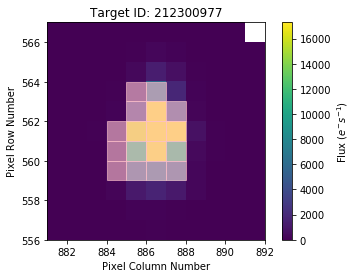

In [3]:
tpf.plot(frame=1,aperture_mask=tpf.pipeline_mask)

In [4]:
lc = tpf.to_lightcurve()
lc.primary_header = tpf.hdu[0].header
lc.data_header = tpf.hdu[1].header


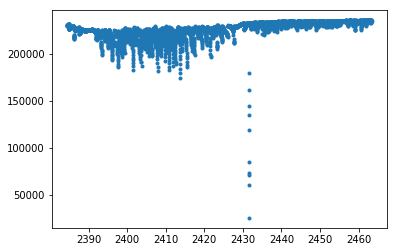

In [5]:
plt.plot(lc.time, lc.flux,'.')


### Let's now try K2SC

In [6]:
# now the magic happens
lc.__class__ = k2sc_lc

In [7]:
lc.k2sc()

Using default splits [2344] for campaign 5
Starting initial outlier detection
  Flagged 116 ( 0.0%) outliers.
Starting Lomb-Scargle period search
  Using SqrExp position kernel
  Found periodicity p =   17.54 (fap 3.3995e-95 < 1e-50), will use a quasiperiodic kernel
Starting global hyperparameter optimisation using DE
('  DE iteration %3i -ln(L) %4.1f', 0, -4296.743955555461)
('  DE iteration %3i -ln(L) %4.1f', 1, -4303.54872361735)
('  DE iteration %3i -ln(L) %4.1f', 2, -4339.174520304715)
('  DE iteration %3i -ln(L) %4.1f', 3, -4357.02996590275)
('  DE iteration %3i -ln(L) %4.1f', 4, -4357.02996590275)
('  DE iteration %3i -ln(L) %4.1f', 5, -4357.02996590275)
('  DE iteration %3i -ln(L) %4.1f', 6, -4357.02996590275)
('  DE iteration %3i -ln(L) %4.1f', 7, -4365.467107756666)
('  DE iteration %3i -ln(L) %4.1f', 8, -4365.467107756666)
('  DE iteration %3i -ln(L) %4.1f', 9, -4365.467107756666)
('  DE iteration %3i -ln(L) %4.1f', 10, -4365.467107756666)
('  DE iteration %3i -ln(L) %4.1f',

Text(0.5,1.01,'WASP-55')

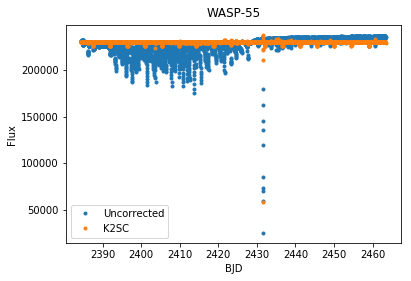

In [8]:
plt.plot(lc.time,lc.flux,'.',label="Uncorrected")
plt.plot(lc.time,lc.corr_flux-lc.tr_time + np.nanmedian(lc.tr_time),'.',label="K2SC")
plt.legend()
plt.xlabel('BJD')
plt.ylabel('Flux')
plt.title('WASP-55',y=1.01)